 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
whale_returns_data= Path("C:/Users/ABUZAR/FINTECHMAIN/Python5/UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main/Homework/04-Pandas/Instructions/Starter_Code/Resources/whale_returns.csv")
whale_returns= pd.read_csv(whale_returns_data, index_col= "Date", infer_datetime_format=True, parse_dates=True)
#whale_returns.head()
whale_returns=whale_returns.sort_index()

In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
algo_returns_data= Path("C:/Users/ABUZAR/FINTECHMAIN/Python5/UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main/Homework/04-Pandas/Instructions/Starter_Code/Resources/algo_returns.csv")
algo_returns= pd.read_csv(algo_returns_data, index_col= "Date", infer_datetime_format=True, parse_dates=True)
#algo_returns.head(20)
algo_returns=algo_returns.sort_index()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_data= Path("C:/Users/ABUZAR/FINTECHMAIN/Python5/UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main/Homework/04-Pandas/Instructions/Starter_Code/Resources/sp_tsx_history.csv")
sp_tsx_history= pd.read_csv(sp_tsx_history_data, index_col= "Date", infer_datetime_format=True, parse_dates=True)
#sp_tsx_history.head()
sp_tsx_history=sp_tsx_history.sort_index()
sp_tsx_history.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [9]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp_tsx_history["Close"]=sp_tsx_history["Close"].str.replace("$", "", regex=False)
sp_tsx_history["Close"]=sp_tsx_history["Close"].str.replace(",","", regex=False).astype(float)
sp_tsx_history.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [11]:
# Calculate Daily Returns
sp_tsx_returns= sp_tsx_history.pct_change()
sp_tsx_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [12]:
# Drop nulls
sp_tsx_returns.dropna(inplace=True)
sp_tsx_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns.rename(columns={"Close": "S&P TSX 60"}, inplace=True)
sp_tsx_returns.head()

,S&P TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_portfolios=pd.concat([whale_returns, algo_returns, sp_tsx_returns], axis="columns", join="inner") 
all_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

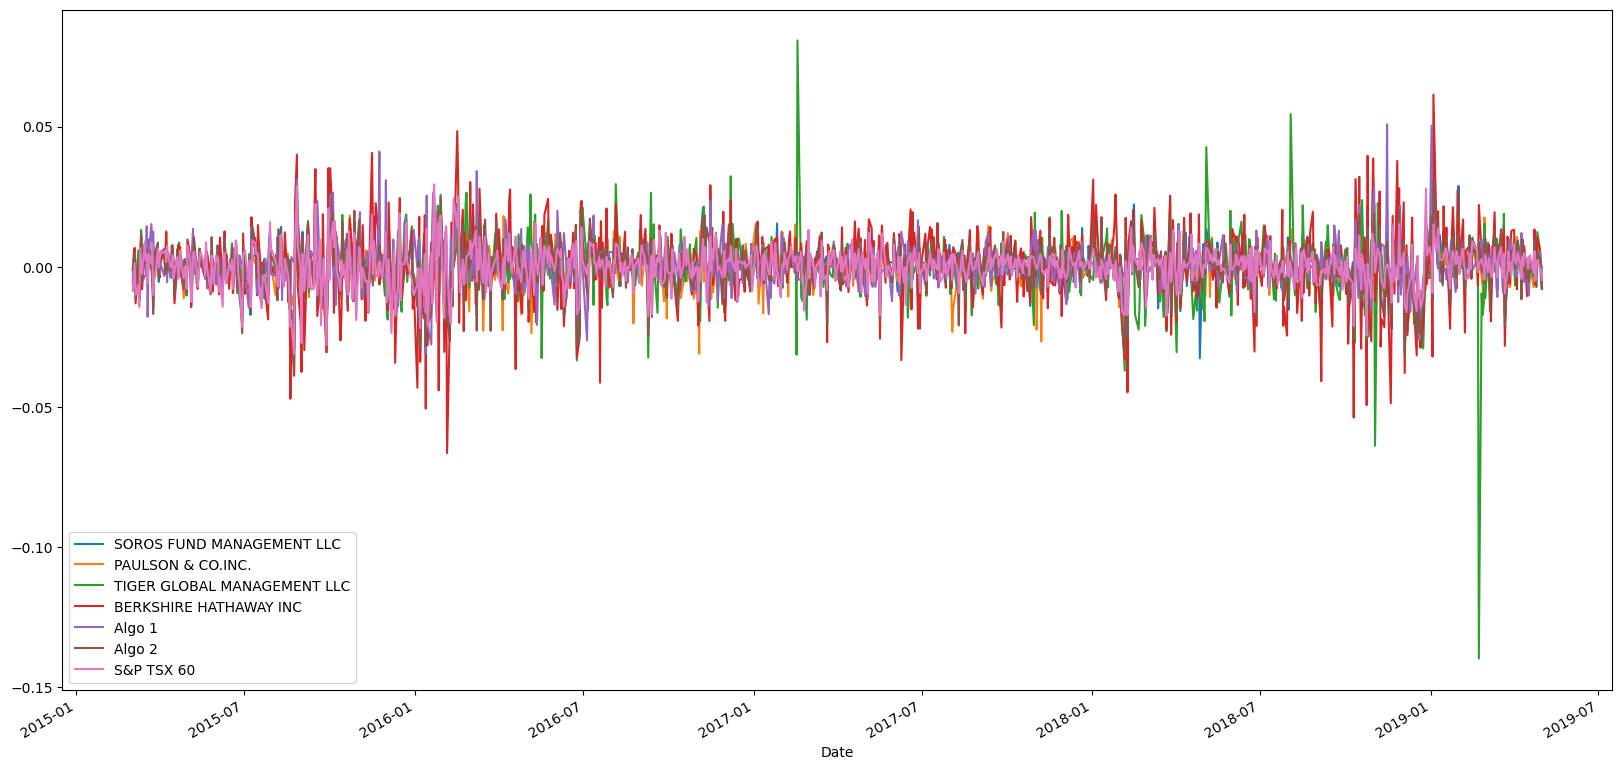

In [15]:
# Plot daily returns of all portfolios
all_portfolios.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of all portfolios'}, xlabel='Date'>

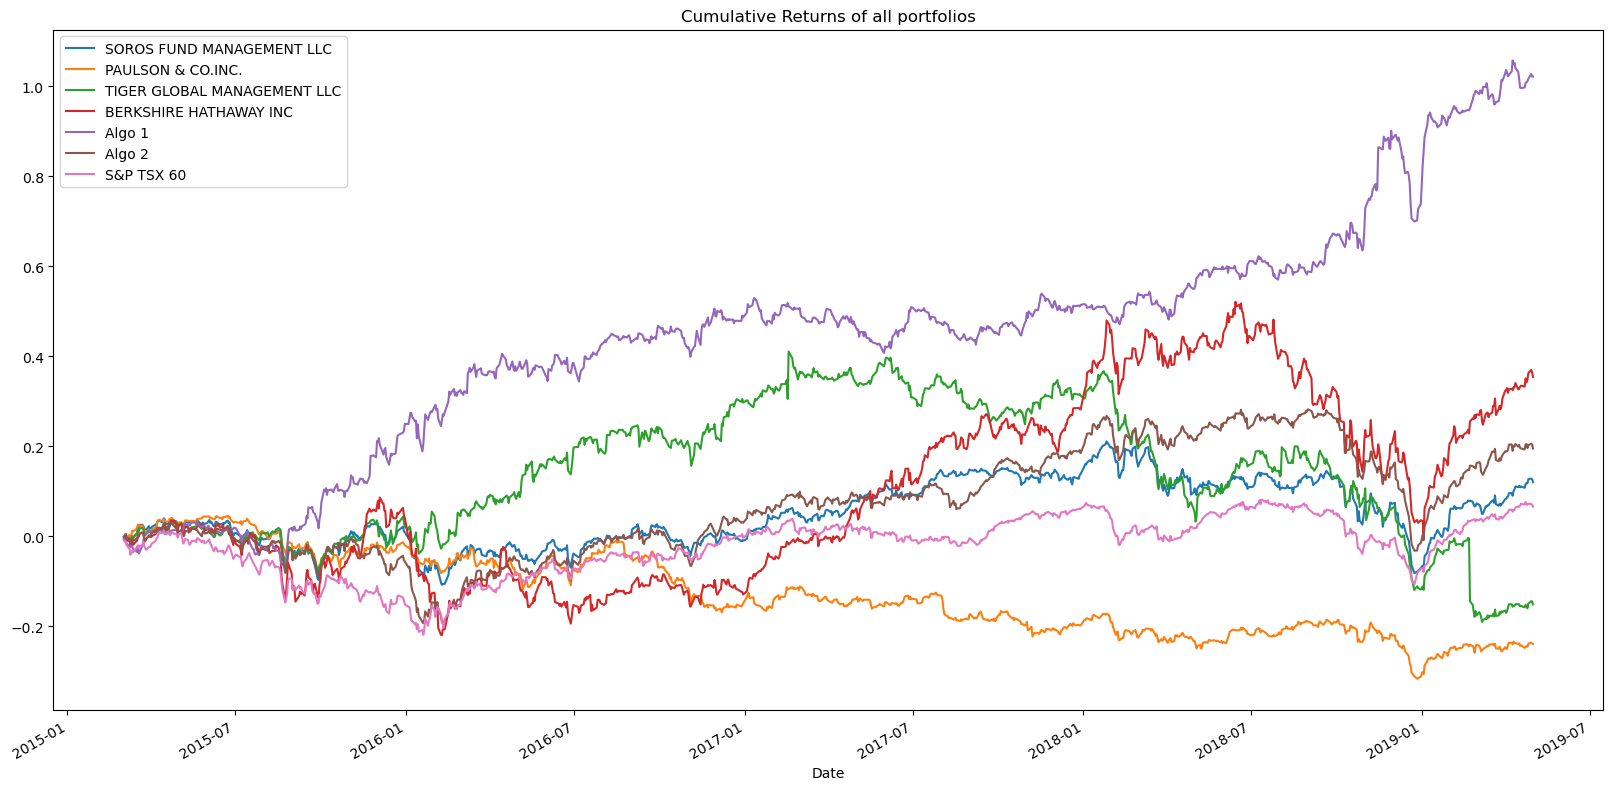

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns= (1+ all_portfolios).cumprod() -1
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title= "Cumulative Returns of all portfolios")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

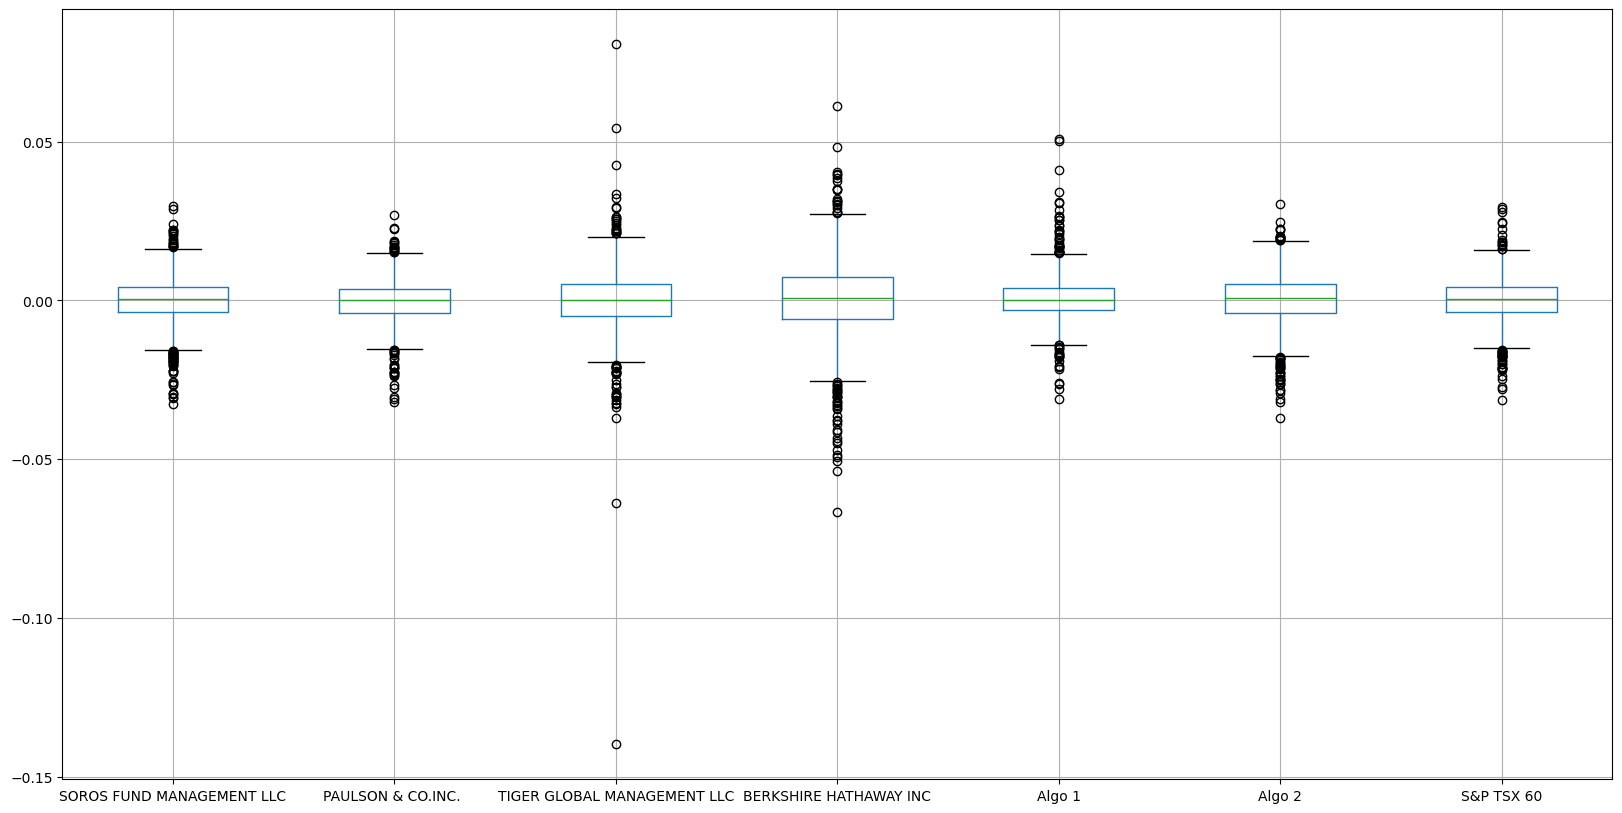

In [17]:
# Box plot to visually show risk
#cumulative_returns.boxplot(figsize=(20,5))
all_portfolios.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
daily_std= all_portfolios.std()
daily_std.head(7)

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX 60                     0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [19]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_std=sp_tsx_returns.std()
sp_tsx_std

S&P TSX 60    0.006637
dtype: float64

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
Volatility= daily_std * np.sqrt(252)
Volatility

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX 60                     0.111664
dtype: float64

In [21]:
# Determine which portfolios are riskier than the S&P TSX 60
Volatility.sort_values()

PAULSON & CO.INC.              0.110841
S&P TSX 60                     0.111664
Algo 1                         0.120470
SOROS FUND MANAGEMENT LLC      0.124259
Algo 2                         0.132177
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

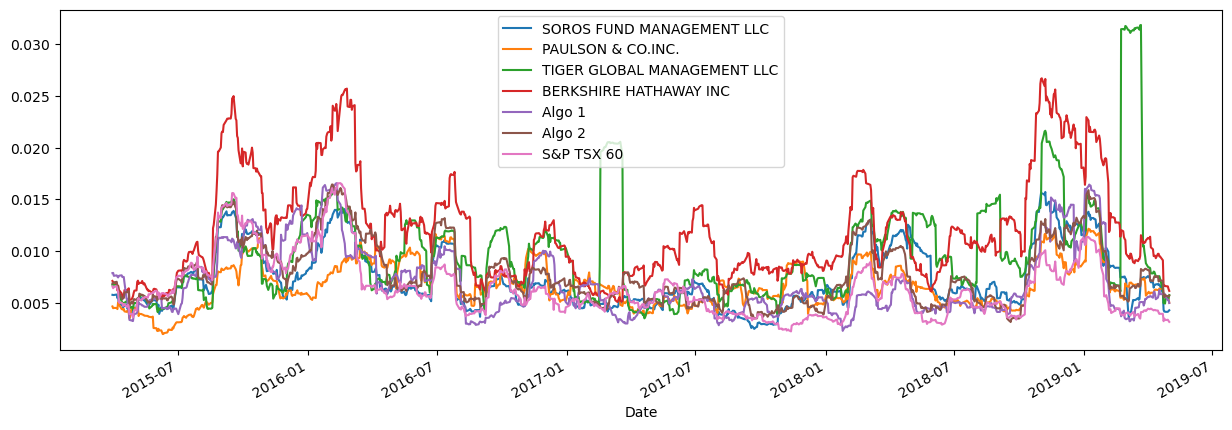

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_portfolios.rolling(window=21).std()
# Plot the rolling standard deviation
all_portfolios.rolling(window=21).std().plot(figsize=(15,5))

### Calculate and plot the correlation

In [23]:
# Calculate the correlation
correlation= all_portfolios.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

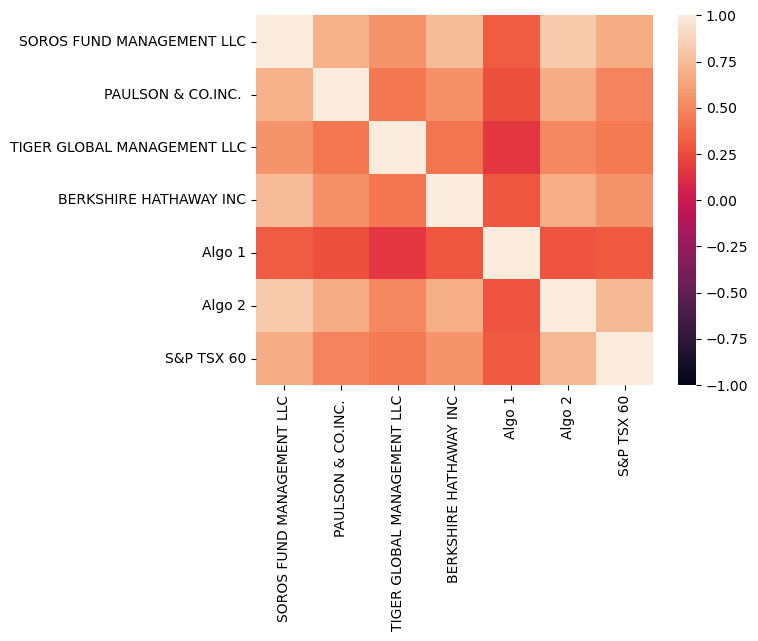

In [24]:
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [25]:
# Calculate covariance of a Algo 1
algo_covariance= all_portfolios["Algo 1"].cov(sp_tsx_returns["S&P TSX 60"])
print(f"algo covariance:{algo_covariance}")

algo covariance:1.6563000308911385e-05


In [26]:
# Calculate variance of S&P TSX
variance=sp_tsx_returns["S&P TSX 60"].var()
print(f"S&P TSX 60 variance:{variance}")

S&P TSX 60 variance:4.405458170898365e-05


In [27]:
# Computing beta
algo_beta= algo_covariance/variance
print(f"Algo Beta:{algo_beta}")

Algo Beta:0.3759654425576771


In [28]:
# Plot beta trend
#rolling_algo_beta=pd.DataFrame()
covariance= all_portfolios["Algo 1"].rolling(window=21).cov(all_portfolios["S&P TSX 60"])
#rolling_algo_beta=rolling_algo_beta.sort_index()


In [29]:
#rolling_sp_variance= sp_tsx_returns["S&P TSX 60"].rolling(window=21).var()
variance= all_portfolios["S&P TSX 60"].rolling(window=21).var()
#rolling_algo_beta["beta"]=rolling_algo_beta["covar"]/rolling_algo_beta["var"]
#rolling_algo_beta.to_csv('rolling_algo.csv')
beta=covariance/variance
all_portfolios.to_csv("all_portfolios.csv")
sp_tsx_returns.dtypes

S&P TSX 60    float64
dtype: object

<AxesSubplot:title={'center':'Rolling 21-Day Beta of Algo 1'}, xlabel='Date'>

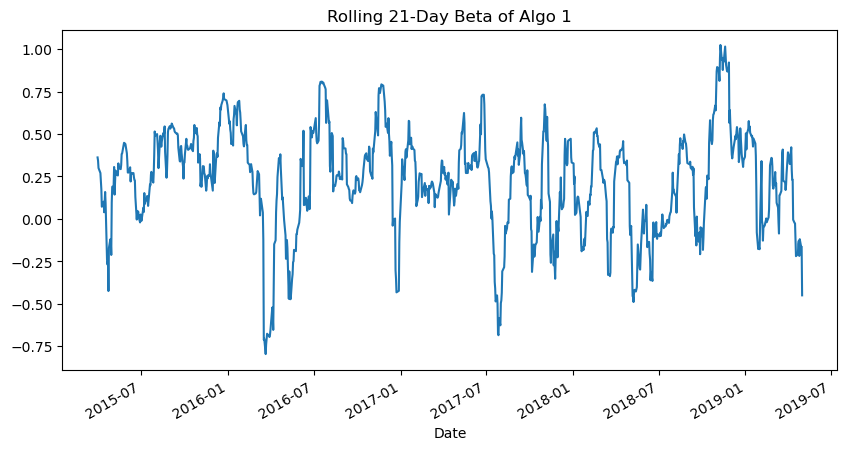

In [30]:
#plot 21 rolling beta
beta.plot(figsize=(10,5), title= "Rolling 21-Day Beta of Algo 1")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

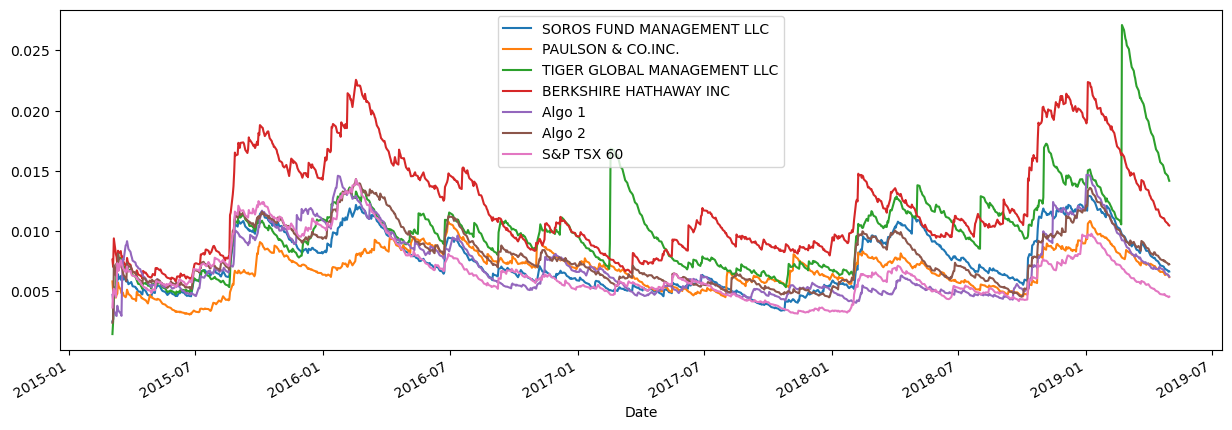

In [62]:
# Use `ewm` to calculate the rolling window
#daily_std_emw= pd.ewm(df["daily_std"], span=21, freq="D")
daily_std_ewm= all_portfolios.ewm(halflife=21).std().plot(figsize=(15,5))
#daily_std_ewm

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [32]:
# Annualized Sharpe Ratios
sharpe_ratios=(all_portfolios.mean() * 252)/(all_portfolios.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60                     0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

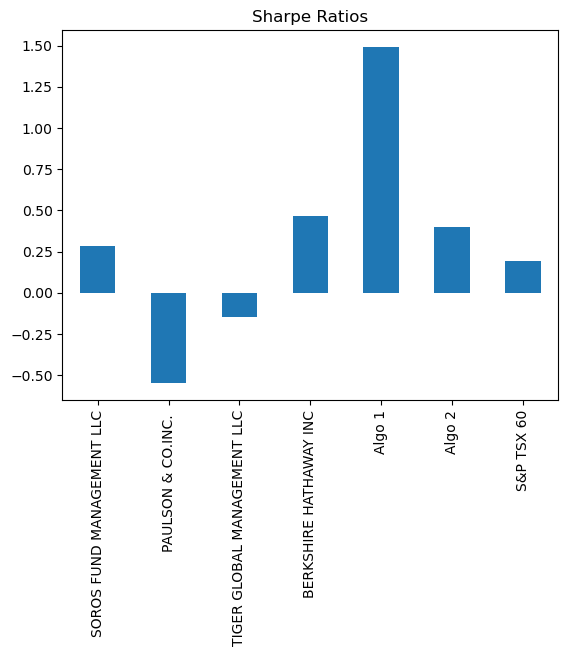

In [33]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Since Algo 1's sharp ratios are the highest. It outperformed both S&P TSX 60 and whales portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [34]:
# Reading data from 1st stock
goog_history_data= Path("C:/Users/ABUZAR/FINTECHMAIN/Python5/UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main/Homework/04-Pandas/Instructions/Starter_Code/Resources/goog_history.csv")
goog_history= pd.read_csv(goog_history_data, index_col= "Date", infer_datetime_format=True, parse_dates=True)
goog_history.head()

,Close
Date,
2019-01-11,52.859501
2019-01-14,52.234501
2019-01-15,53.857498
2019-01-16,54.048500
2019-01-17,54.494999


In [35]:
# Reading data from 2nd stock
msft_history_data= Path("C:/Users/ABUZAR/FINTECHMAIN/Python5/UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main/Homework/04-Pandas/Instructions/Starter_Code/Resources/msft_history.csv")
msft_history= pd.read_csv(msft_history_data, index_col= "Date", infer_datetime_format=True, parse_dates=True)
msft_history.head()

,Close
Date,
2019-01-11,98.761711
2019-01-14,98.041183
2019-01-15,100.884895
2019-01-16,101.240356
2019-01-17,101.951302


In [36]:
# Reading data from 3rd stock
tsla_history_data= Path("C:/Users/ABUZAR/FINTECHMAIN/Python5/UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main/Homework/04-Pandas/Instructions/Starter_Code/Resources/tsla_history.csv")
tsla_history= pd.read_csv(tsla_history_data, index_col= "Date", infer_datetime_format=True, parse_dates=True)
tsla_history.head()

,Close
Date,
2019-01-11,23.150667
2019-01-14,22.293333
2019-01-15,22.962000
2019-01-16,23.070000
2019-01-17,23.153999


In [37]:
# Combine all stocks in a single DataFrame
# Reset Date index
combine_df=pd.concat([goog_history, msft_history, tsla_history], axis="columns", join="inner")
combine_df.head()
goog_history.shape

(923, 1)

In [38]:
# Reorganize portfolio data by having a column per symbol
columns=["GOOG", "MSFT", "TSLA"]
combine_df.columns=columns
combine_df.head()
msft_history.shape
combine_df.shape

(923, 3)

In [39]:
# Calculate daily returns
combine_df_returns= combine_df.pct_change()
combine_df_returns.head()
tsla_history.shape

(923, 1)

In [40]:
# Drop NAs
combine_df_returns.dropna(inplace=True)

In [41]:
# Display sample data
combine_df_returns.head()

,GOOG,MSFT,TSLA
Date,,,
2019-01-14,-0.011824,-0.007296,-0.037033
2019-01-15,0.031071,0.029005,0.029994
2019-01-16,0.003546,0.003523,0.004703
2019-01-17,0.008261,0.007022,0.003641
2019-01-18,0.007670,0.014983,-0.129711


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [42]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
combine_weighted_returns= combine_df_returns.dot(weights)
# Display sample data
#combine_weighted_returns.head()
#all_portfolio_returns.shape
#combine_weighted_returns.shape
combine_weighted_returns.shape

(922,)

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [43]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolio_returns=pd.concat([combine_weighted_returns, combine_df_returns, sp_tsx_returns], axis="columns", join="inner") 
all_portfolio_returns.head()
#sp_tsx_df=all_portfolios[["SP TSX 60"]]
#all_portfolio_returns_final=pd.concat([all_portfolio_returns, sp_tsx_df], axis="columns", join="inner") 
#all_portfolio_returns_final    
#all_portfolios=pd.concat([whale_returns, algo_returns, sp_tsx_returns], axis="columns", join="inner")
all_portfolio_returns.tail()

,0,GOOG,MSFT,TSLA,S&P TSX 60
Date,,,,,
2019-12-20,0.003332,-0.004757,0.010918,0.003836,0.003188
2019-12-23,0.011017,-0.000556,0.000000,0.033605,0.000600
2019-12-24,0.003426,-0.003914,-0.000191,0.014384,0.003003
2019-12-27,-0.001909,-0.006255,0.001828,-0.001300,-0.000695
2019-12-30,-0.018901,-0.011650,-0.008619,-0.036433,-0.004057


In [44]:
columns=["WEIGHTED" "GOOG", "MSFT", "TSLA","S&P TSX 60"]
all_portfolio_returns.rename({0:"WEIGHTED"},inplace=True, axis=1)
all_portfolio_returns.head()

,WEIGHTED,GOOG,MSFT,TSLA,S&P TSX 60
Date,,,,,
2019-01-14,-0.018717,-0.011824,-0.007296,-0.037033,0.002433
2019-01-15,0.030024,0.031071,0.029005,0.029994,0.004724
2019-01-16,0.003924,0.003546,0.003523,0.004703,0.004319
2019-01-17,0.006308,0.008261,0.007022,0.003641,0.006615
2019-01-18,-0.035686,0.007670,0.014983,-0.129711,0.006088


In [45]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolio_returns.dropna(inplace=True)
all_portfolio_returns.head()

,WEIGHTED,GOOG,MSFT,TSLA,S&P TSX 60
Date,,,,,
2019-01-14,-0.018717,-0.011824,-0.007296,-0.037033,0.002433
2019-01-15,0.030024,0.031071,0.029005,0.029994,0.004724
2019-01-16,0.003924,0.003546,0.003523,0.004703,0.004319
2019-01-17,0.006308,0.008261,0.007022,0.003641,0.006615
2019-01-18,-0.035686,0.007670,0.014983,-0.129711,0.006088


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [46]:
# Calculate the annualized `std`
#Volatility= all_portfolio_returns * np.sqrt(252)
#Volatility
portfolio_std=all_portfolio_returns.std() * np.sqrt(252)
portfolio_std

WEIGHTED      0.231144
GOOG          0.235054
MSFT          0.188848
TSLA          0.491045
S&P TSX 60    0.070644
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

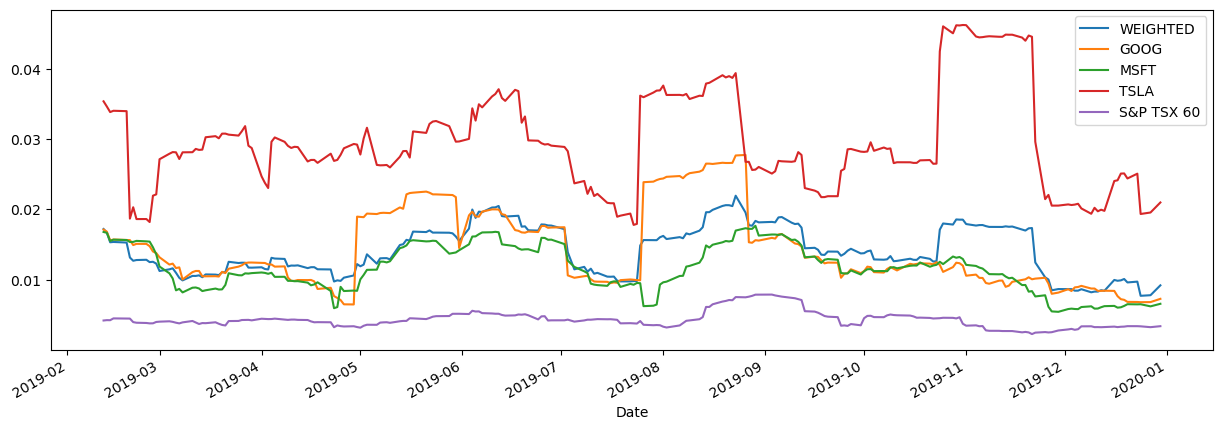

In [47]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
all_portfolio_returns.rolling(window=21).std().plot(figsize=(15,5))


### Calculate and plot the correlation

In [48]:
# Calculate and plot the correlation
correlation1= all_portfolio_returns.corr()

<AxesSubplot:>

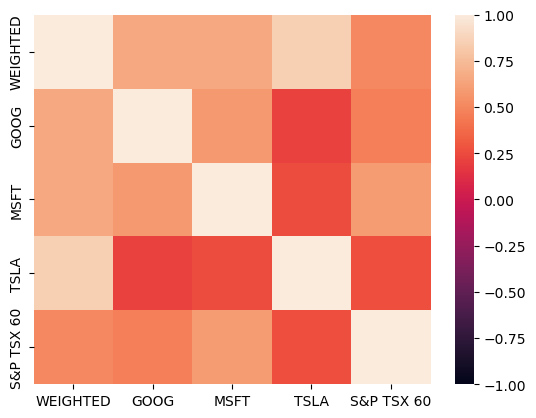

In [49]:
sns.heatmap(correlation1, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [50]:
# Calculate and plot Beta
weighted_covariance= all_portfolio_returns["WEIGHTED"].cov(all_portfolio_returns["S&P TSX 60"])
goog_covariance= all_portfolio_returns["GOOG"].cov(all_portfolio_returns["S&P TSX 60"])
msft_covariance= all_portfolio_returns["MSFT"].cov(all_portfolio_returns["S&P TSX 60"])
tsla_covariance= all_portfolio_returns["TSLA"].cov(all_portfolio_returns["S&P TSX 60"])

In [51]:
print(f"Google covariance:{goog_covariance}")
print(f"Microsoft covariance:{msft_covariance}")
print(f"Tesla covariance:{tsla_covariance}")
print(f"Weighted covariance:{weighted_covariance}")

Google covariance:3.060829241411423e-05
Microsoft covariance:3.1724039633033376e-05
Tesla covariance:3.5581647970034796e-05
Weighted covariance:3.263799333906079e-05


In [52]:
variance= all_portfolio_returns["S&P TSX 60"].var()
goog_beta= goog_covariance/variance
msft_beta= msft_covariance/variance
tsla_beta= tsla_covariance/variance
weighted_beta= weighted_covariance/variance
print(f"GOOG: {goog_beta} | MSFT: {msft_beta} | TSLA:{tsla_beta} | WEIGHTED: {weighted_beta}")

GOOG: 1.5455578410804656 | MSFT: 1.6018972094951838 | TSLA:1.7966861487932357 | WEIGHTED: 1.6480470664562945


In [53]:
#all_portfolio_returns.to_csv("all_portfolios_returns.csv")

In [54]:
rolling_goog_covariance= all_portfolio_returns["GOOG"].rolling(window=60).cov(all_portfolio_returns["S&P TSX 60"])
rolling_msft_covariance= all_portfolio_returns["MSFT"].rolling(window=60).cov(all_portfolio_returns["S&P TSX 60"])
rolling_tsla_covariance= all_portfolio_returns["TSLA"].rolling(window=60).cov(all_portfolio_returns["S&P TSX 60"])    
rolling_weighted_covariance= all_portfolio_returns["WEIGHTED"].rolling(window=60).cov(all_portfolio_returns["S&P TSX 60"])

In [55]:
rolling_sp_variance= all_portfolio_returns["S&P TSX 60"].rolling(window=60).var()

In [56]:
rolling_goog_beta= rolling_goog_covariance/rolling_sp_variance
rolling_msft_beta= rolling_msft_covariance/rolling_sp_variance
rolling_tsla_beta= rolling_tsla_covariance/rolling_sp_variance
rolling_weighted_beta= rolling_weighted_covariance/rolling_sp_variance

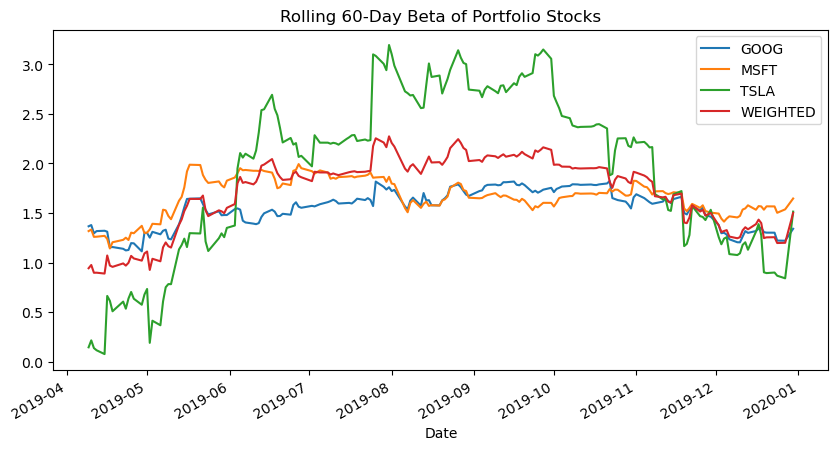

In [57]:
#Plot rolling beta
ax= rolling_goog_beta.plot(figsize=(10,5), title= "Rolling 60-Day Beta of Portfolio Stocks")
rolling_msft_beta.plot(ax=ax)
rolling_tsla_beta.plot(ax=ax)
rolling_weighted_beta.plot(ax=ax)
#set legend
ax.legend(["GOOG", "MSFT", "TSLA", "WEIGHTED"])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [58]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios1=(all_portfolio_returns.mean() * 252)/(all_portfolio_returns.std() * np.sqrt(252))
sharpe_ratios1

WEIGHTED      1.609501
GOOG          1.290955
MSFT          2.739162
TSLA          0.601475
S&P TSX 60    1.879019
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

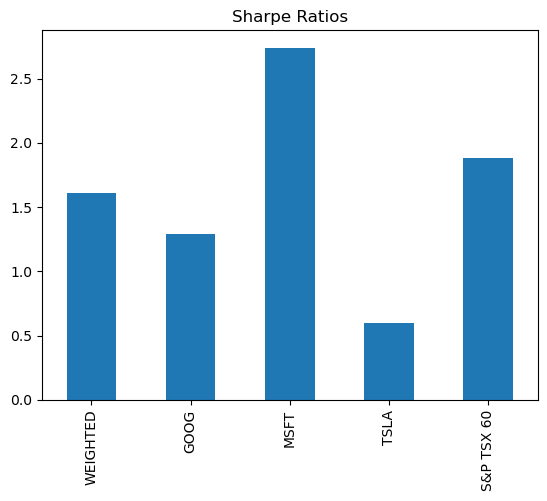

In [59]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios1.plot.bar(title="Sharpe Ratios")

### How does your portfolio do?

Since Microsoft's sharp ratios are the highest. It outperformed both Goog and Tsla.